In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
dataset_path = Path(r"../data/theta_posix_with_apps_no_negative_outliers_no_time_witherrors.csv")

In [3]:
df = pd.read_csv(Path(r"./captum/Theta_captum_ig_result.csv"))
df_dl = pd.read_csv(Path(r"./captum/Theta_captum_dl_result.csv"))

In [4]:
df_data = pd.read_csv(dataset_path)
df_data = df_data

In [5]:
df_data[df_data["exe"].str.contains("rxmd")]["rank"].unique()

array([-1])

In [6]:
df.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,164.62486,504.0057,0.0,-4.691056e+03,-19692.02100,101.526474,-313.20108,-0.0,-0.0,...,-0.000000,-0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-0.000000,-0.00000
1,1,-3326.64280,-15008.3570,0.0,-1.901672e+03,-9531.69800,-90.095160,-190.56694,-0.0,-0.0,...,0.000000,0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-0.000000,-1044.58200
2,2,-534.76697,5990.9087,-0.0,2.683670e+06,-501.69464,-158.731250,-103.37201,-0.0,0.0,...,62.100132,0.0,0.0,-263.2697,-0.0,-0.0,0.0,-0.0,12.987822,570.79083
3,3,-3331.56860,-14997.9760,0.0,-1.903801e+03,-9515.43300,-90.049194,-190.68591,-0.0,-0.0,...,0.000000,0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-124.784030,-1045.21690
4,4,164.62486,504.0057,0.0,-4.691056e+03,-19692.02100,101.526474,-313.20108,-0.0,-0.0,...,-0.000000,-0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-0.000000,-0.00000


In [7]:
df_dl.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,164.61119,503.99063,0.0,-4.690639e+03,-19689.70100,101.521126,-313.180450,-0.0,-0.0,...,-0.00000,-0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-0.00000,-0.00000
1,1,-3326.89900,-15007.22900,0.0,-1.901519e+03,-9530.06250,-90.114750,-190.514220,-0.0,-0.0,...,0.00000,0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-0.00000,-1044.43630
2,2,-534.76710,5990.90800,-0.0,2.683669e+06,-501.69464,-158.731230,-103.372025,-0.0,0.0,...,62.09913,0.0,0.0,-263.2697,-0.0,-0.0,0.0,-0.0,12.98782,570.79083
3,3,-3331.33800,-14997.87900,0.0,-1.903436e+03,-9515.42700,-90.073875,-190.620440,-0.0,-0.0,...,0.00000,0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-124.77728,-1045.00730
4,4,164.61116,503.99063,0.0,-4.690639e+03,-19689.70100,101.521126,-313.180420,-0.0,-0.0,...,-0.00000,-0.0,-0.0,0.0000,-0.0,-0.0,0.0,0.0,-0.00000,-0.00000


In [8]:
df_diff = df_dl - df
df_diff.describe().transpose()#.abs().sort_values(ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,218111.0,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.00000
POSIX_OPENS,218111.0,-0.433331,28.421564,-4635.5000,-0.00030,0.021300,2.01000,2657.36000
POSIX_FILENOS,218111.0,4.520030,66.085527,-734.7200,-0.02400,0.001000,2.66000,14012.60000
POSIX_DUPS,218111.0,0.002554,0.238747,-20.2400,0.00000,0.000000,0.00000,37.54775
POSIX_READS,218111.0,0.426268,7.126224,-1300.0000,0.00400,0.272800,0.42200,1000.00000
...,...,...,...,...,...,...,...,...
WRITE_10M_100M,218111.0,0.000122,0.032377,-0.7468,0.00000,0.000000,0.00000,10.92000
WRITE_100M_1G,218111.0,-0.000003,0.001079,-0.3820,0.00000,0.000000,0.00000,0.01148
WRITE_1G_PLUS,218111.0,0.000004,0.001647,-0.0803,0.00000,0.000000,0.00000,0.64222
rank,218111.0,-0.008573,1.492793,-120.6600,-0.01491,-0.000013,0.00000,499.90000


**Attention: std sensitive to outliers?**

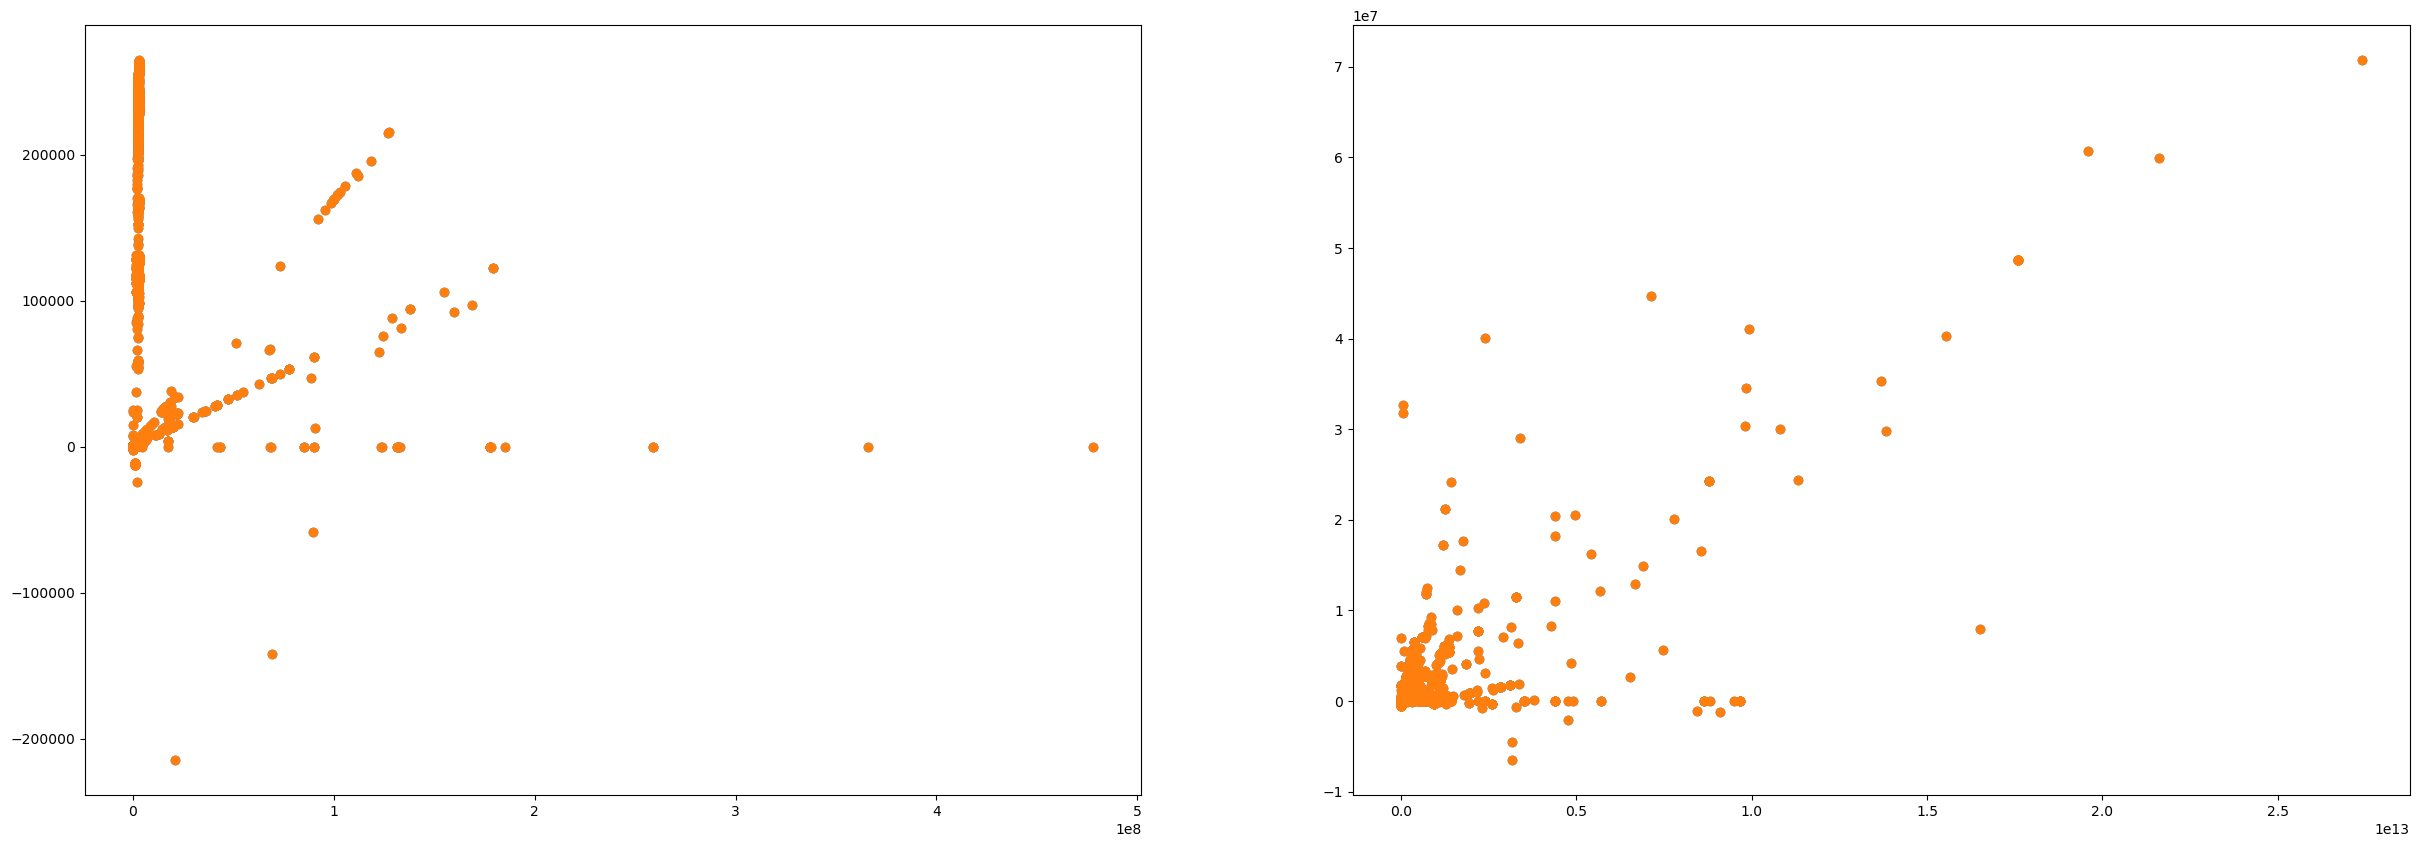

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
axs[0].scatter(x=df_data.POSIX_STATS,y=df.POSIX_STATS)
axs[0].scatter(x=df_data.POSIX_STATS,y=df_dl.POSIX_STATS)
axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN,y=df.POSIX_BYTES_WRITTEN)
axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN,y=df_dl.POSIX_BYTES_WRITTEN)

In [10]:
df_diff["POSIX_OPENS"].sort_values(ascending=False).head()

46011    2657.36
80248     839.00
33234     796.30
86973     738.96
49901     642.24
Name: POSIX_OPENS, dtype: float64

In [11]:
df_data.iloc[29918]

POSIX_OPENS                                                  27597483
POSIX_FILENOS                                                27597483
POSIX_DUPS                                                          0
POSIX_READS                                                         0
POSIX_WRITES                                                        1
                                          ...                        
POSIX_TOTAL_TIME                                            69.413717
nprocs                                                            512
exe                 simple_cycpep_predict.cxx11threadmpiserializat...
mean                                                              NaN
error                                                             0.0
Name: 29918, Length: 93, dtype: object

In [12]:
df.iloc[29918].POSIX_OPENS

np.float64(1033215.75)

In [13]:
df_dl.iloc[29918].POSIX_OPENS

np.float64(1032317.6)

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,218111.0,1.090550e+05,6.296337e+04,0.000000e+00,54527.500,109055.000000,163582.50000,2.181100e+05
POSIX_OPENS,218111.0,-5.331364e+03,8.067878e+04,-4.558504e+05,-24045.723,-2481.109900,-728.38824,2.223800e+06
POSIX_FILENOS,218111.0,-4.713291e+04,1.899719e+05,-2.496766e+07,-85847.266,-15006.141000,1678.77600,2.655235e+06
POSIX_DUPS,218111.0,4.619782e+00,1.288786e+03,-1.525782e+05,0.000,0.000000,0.00000,1.843438e+05
POSIX_READS,218111.0,2.059756e+06,1.192111e+08,-6.180626e+06,-4764.354,-1520.144400,5829.53300,1.845571e+10
...,...,...,...,...,...,...,...,...
WRITE_10M_100M,218111.0,-3.940418e+01,3.081582e+03,-3.719935e+05,-0.000,0.000000,-0.00000,3.765789e+04
WRITE_100M_1G,218111.0,1.676651e+00,2.349316e+02,-7.076114e+03,0.000,0.000000,0.00000,4.881211e+04
WRITE_1G_PLUS,218111.0,2.998017e-03,5.531099e+00,-1.821501e+03,0.000,0.000000,0.00000,6.054889e+02
rank,218111.0,-2.615424e+01,4.857474e+03,-1.431330e+06,0.000,13.083143,142.06840,5.180572e+04


Compute distance to baseline per row. Baseline output is about 75, so be careful with the interpretation around ig_value of 0!

In [15]:
df.sum(axis=1).describe()

count    2.181110e+05
mean     8.099291e+10
std      3.927709e+12
min      1.684890e+01
25%      1.789858e+07
50%      1.799982e+07
75%      2.180809e+08
max      5.998459e+14
dtype: float64

In [16]:
df_dl.sum(axis=1).describe()

count    2.181110e+05
mean     8.099291e+10
std      3.927710e+12
min      1.619945e+01
25%      1.789782e+07
50%      1.799906e+07
75%      2.180809e+08
max      5.998459e+14
dtype: float64

In [17]:
df_data.nprocs

0          64
1          16
2         128
3          16
4          64
         ... 
218106     64
218107     16
218108     96
218109     16
218110     16
Name: nprocs, Length: 218111, dtype: int64

In [18]:
df_data.index

RangeIndex(start=0, stop=218111, step=1)

In [19]:
df_data.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,mean,error
0,7891771,7861736,0,3,424661,60035,90055,0,0,0,...,0,0,0,0,0,29.684507,64,cp2k.psmp,31.913841,-2.229334
1,194,172,0,34,1499,6,54,0,0,0,...,0,0,0,0,0,28.155456,16,pw.x,11.403251,16.752206
2,46037,40869,0,4713059,1719073,1271774,5429,0,0,0,...,0,0,0,0,-1,71229.030892,128,train.x-2.0.3-ifort_intelmpi,NaN,0.000000
3,194,172,0,34,1492,6,54,0,0,0,...,0,0,0,0,2,1.707640,16,pw.x,6.519022,-4.811382
4,7891771,7861736,0,3,424661,60035,90055,0,0,0,...,0,0,0,0,0,34.010366,64,cp2k.psmp,33.631730,0.378636


In [20]:
len(df_data)

218111

In [21]:
df_data.nprocs.unique()

array([    64,     16,    128,      8,    256,     60,   4096,    512,
         8192,   7902, 262144,      1,  51328,   3828,  65536,     96,
            2,   5599,      4,   3820,   8147,  16384,   7369,   1540,
         2048,    576,  12960,  12720,  32768,   1088,   8144,    448,
         1024,     32,    320,   1604,     15,     61,   8153,     12,
         1152,  81920,     20,    157,   6816,  13440,    192,    640,
            7,    960,   9280,   1280,    768,  32000,    832,   5120,
          384,   1216,    704,    896,  24576,  12288,    496,     30,
          150,   1600,   3456,   2160,    120,  40960,    540,    240,
         6336,    816,   1920,  17088,  36864,     24,      3,   9600,
        53184,    300,    200,    500,  53248,      6,    400,  53760,
           40,  49152,     28,   1260,  98304,   2560,   8096,     48,
         7680,     10, 131072,  10604,   3968,    288,  48768,  66561,
         1800,   3072,    180,    800,   1536,   9724,   1128, 122880,
      

- nprocs: only important if it gets really high.
- CONSEC_READS: if reads are consecutive, performance is better.
- CONSEC_WRITES: if writes are consecutive, performance is worse. Why??
- rank: in 56% of the entire dataset the rank is -1, so probably unknown

In [22]:
plt.rcParams.update({'font.size': 23})

In [23]:
df_data_to_plot = df_data[df_data["exe"].str.contains("cp2k")]
df_to_plot = df[df_data["exe"].str.contains("cp2k")]

In [24]:
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)

In [25]:
def plot_df_w_filter(df, filterexp, column, coord, fig, color_data=bytes_read_copy, cmap="viridis"):
    sc = coord.scatter(
        x=df_data[filterexp][column],
        y=df[filterexp][column],
        c=np.log10(color_data[filterexp]),
        cmap=cmap
    )
    coord.set_xlabel(column)
    coord.set_ylabel("log_value")

    divider = make_axes_locatable(coord)
    # cax = divider.append_axes("right", size="5%", pad=0.05)
    # fig.colorbar(sc, cax=cax, orientation="vertical", label="log10(POSIX_BYTES_WRITTEN)")

    return sc

def plot_df_w_filter_no_color(df,filterexp,column,coord,s=72):
    coord.scatter(x=df_data[filterexp][column],y=df[filterexp][column],s=s)
    coord.set_xlabel(column)

In [26]:
def plot_mosaic(filter_spec):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
    [ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
    plot_df_w_filter(df,filter_spec,"nprocs",axs[0,0],fig)
    sc_read = plot_df_w_filter(df,filter_spec,"POSIX_READS",axs[0,1],fig)
    plot_df_w_filter(df,filter_spec,"POSIX_CONSEC_READS",axs[0,2],fig)
    plot_df_w_filter(df,filter_spec,"POSIX_WRITES",axs[1,0],fig,bytes_written_copy,"plasma")
    sc_written = plot_df_w_filter(df,filter_spec,"POSIX_CONSEC_WRITES",axs[1,1],fig,bytes_written_copy,"plasma")
    plot_df_w_filter(df,filter_spec,"rank",axs[1,2],fig)
    plot_df_w_filter(df,filter_spec,"POSIX_STATS",axs[2,0],fig)
    plot_df_w_filter(df,filter_spec,"POSIX_OPENS",axs[2,1],fig)
    plot_df_w_filter(df,filter_spec,"POSIX_FILENOS",axs[2,2],fig)
    fig.subplots_adjust(right=1.5)
    # cbar_ax_read = fig.add_axes([0.93, 0.15, 0.015, 0.7])
    # cbar_ax_write = fig.add_axes([0.97, 0.15, 0.015, 0.7])
    # fig.colorbar(sc_read,cax=cbar_ax_read, shrink=0.7,label="POSIX_BYTES_READ")
    # fig.colorbar(sc_written,cax=cbar_ax_write, shrink=0.7,label="POSIX_BYTES_WRITTEN")
    plt.show()

## rxmd

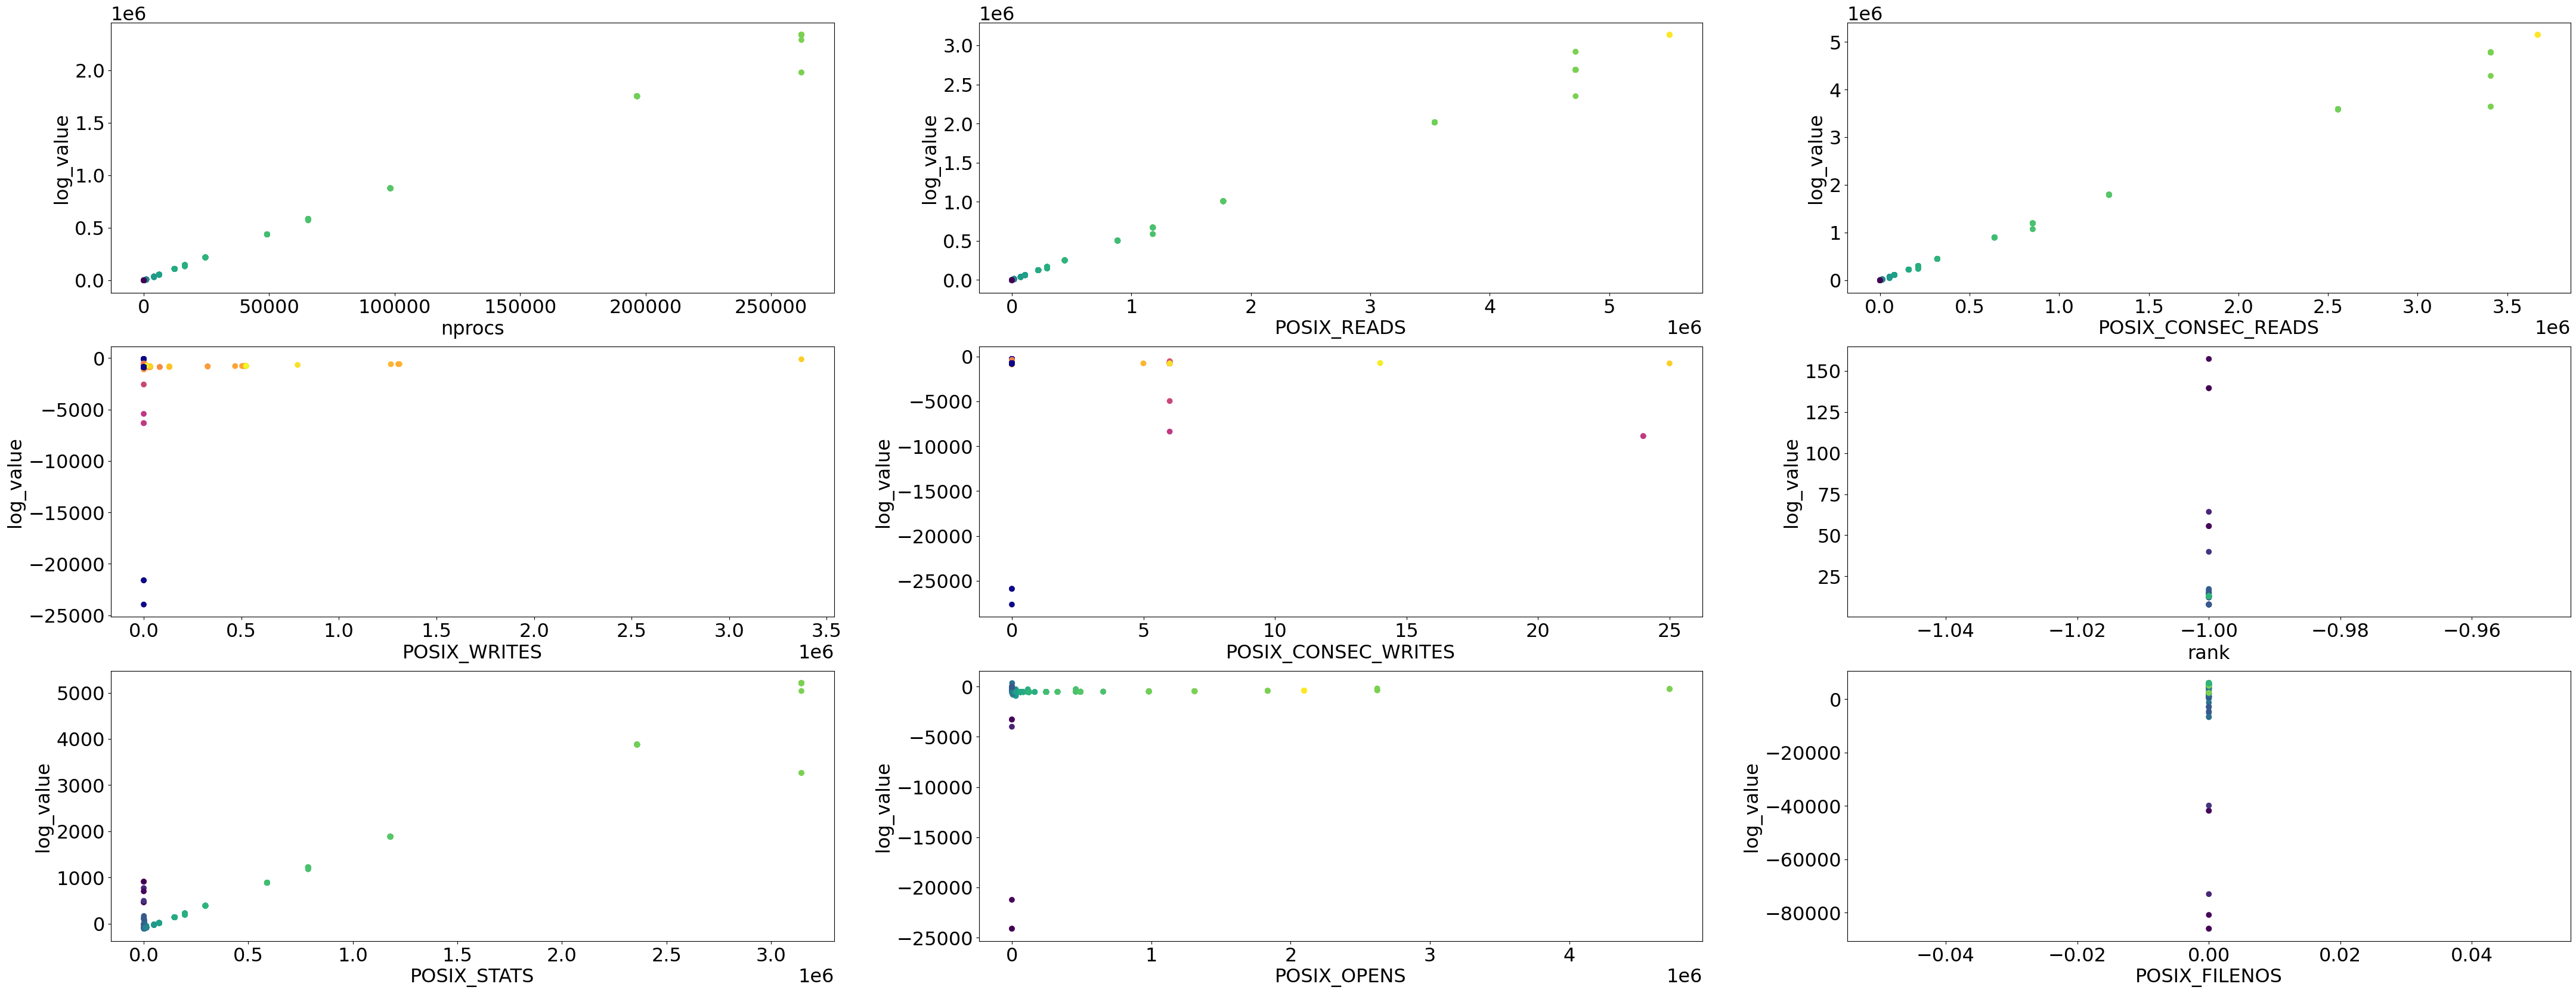

In [27]:
plot_mosaic(df_data["exe"].str.contains("rxmd"))

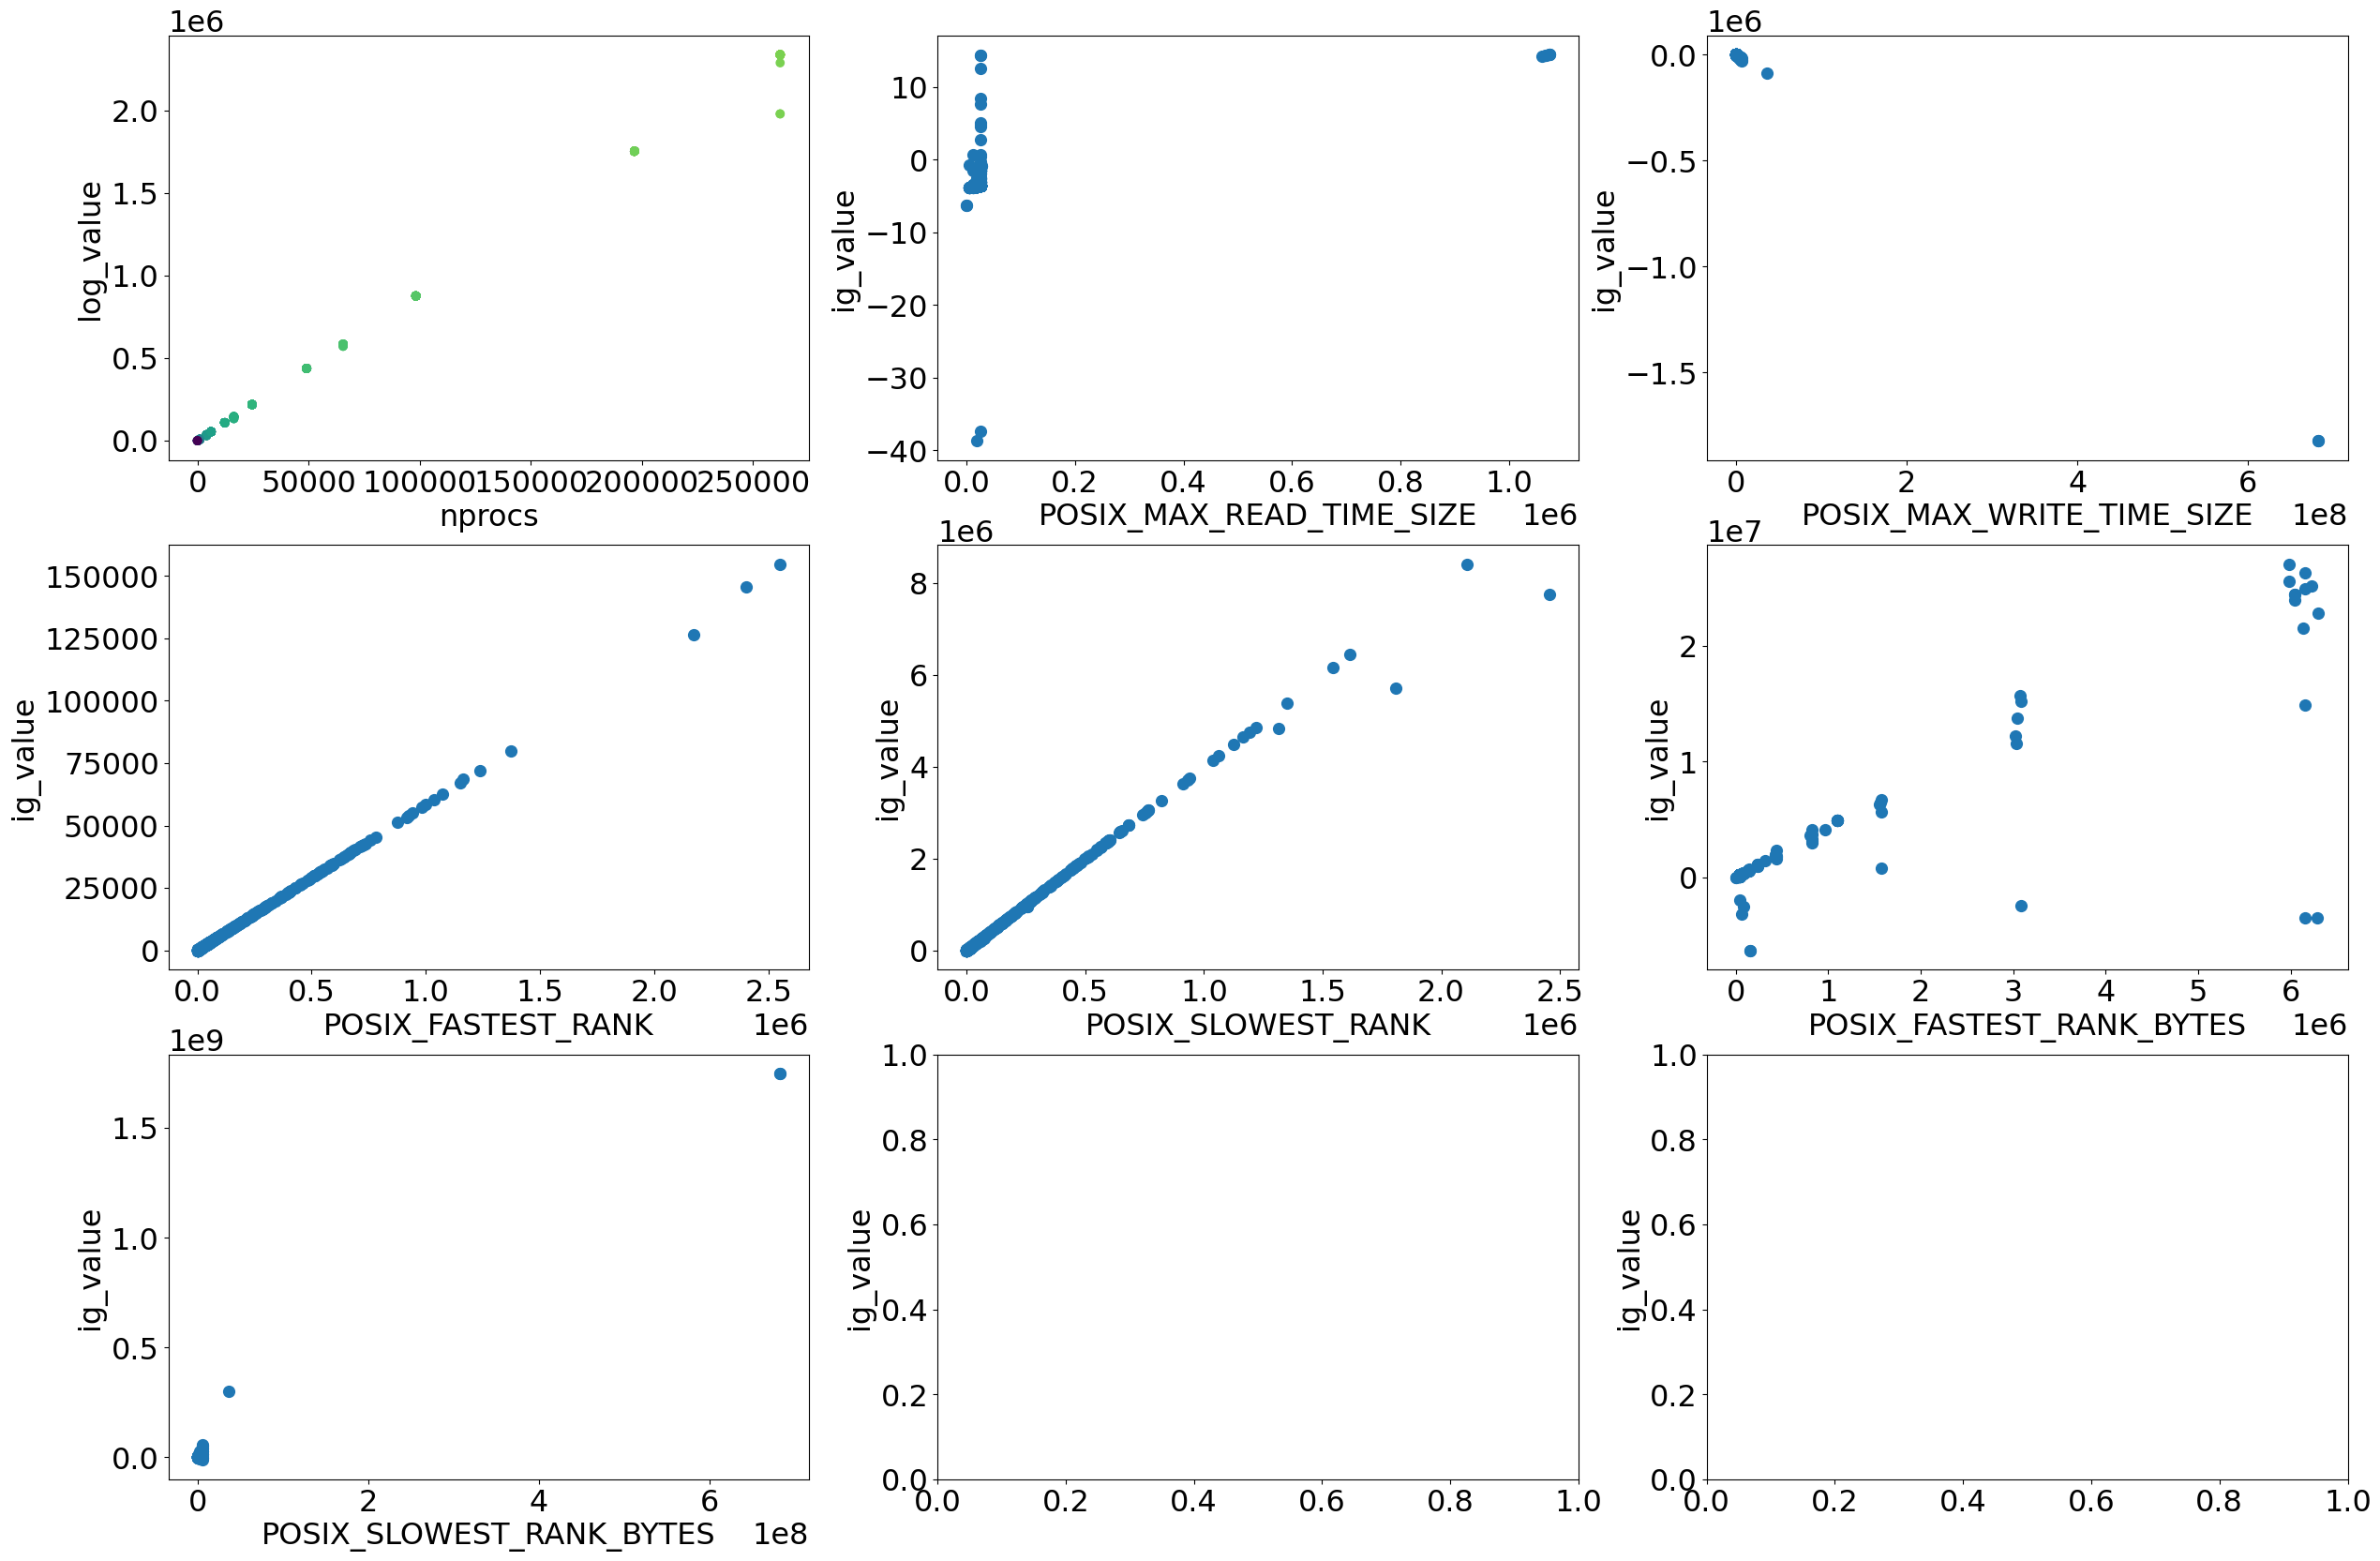

In [28]:
filter_spec = df_data["exe"].str.contains("rxmd")#& (df_data["mean"].isna() == False)
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
[ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
plot_df_w_filter(df,filter_spec,"nprocs",axs[0,0],fig)
plot_df_w_filter_no_color(df,filter_spec,"POSIX_MAX_READ_TIME_SIZE",axs[0,1])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_MAX_WRITE_TIME_SIZE",axs[0,2])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_FASTEST_RANK",axs[1,0])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_SLOWEST_RANK",axs[1,1])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_FASTEST_RANK_BYTES",axs[1,2])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_SLOWEST_RANK_BYTES",axs[2,0])

Duplicate set with highest mean and variance has a surprisingly low error (67.74%)

In [29]:
df[df_data["mean"] == 232360.94867503643].var().sort_values(ascending=False)

POSIX_SLOWEST_RANK          2.536124e+10
POSIX_FASTEST_RANK          7.759398e+06
Unnamed: 0                  2.654208e+06
POSIX_MAX_READ_TIME_SIZE    2.707562e-02
POSIX_FILENOS               0.000000e+00
                                ...     
WRITE_10M_100M              0.000000e+00
WRITE_100M_1G               0.000000e+00
WRITE_1G_PLUS               0.000000e+00
rank                        0.000000e+00
nprocs                      0.000000e+00
Length: 90, dtype: float64

In [30]:
df[df_data["exe"].str.contains("rxmd")].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,457.0,142417.814004,95271.980302,22.000000,16116.000000,209129.000000,2.135370e+05,2.180720e+05
POSIX_OPENS,457.0,-648.400635,1854.244625,-24107.414000,-533.709840,-521.060060,-4.704610e+02,3.543271e+02
POSIX_FILENOS,457.0,4408.932425,9088.651554,-85966.336000,6022.400000,6022.400000,6.022400e+03,6.022697e+03
POSIX_DUPS,457.0,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000e+00,-0.000000e+00
POSIX_READS,457.0,613938.042253,824483.281646,-4425.413000,62863.910000,251788.750000,1.007488e+06,3.134642e+06
...,...,...,...,...,...,...,...,...
WRITE_10M_100M,457.0,-46.380960,659.098585,-9932.312500,0.000000,0.000000,0.000000e+00,-0.000000e+00
WRITE_100M_1G,457.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
WRITE_1G_PLUS,457.0,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000e+00,-0.000000e+00
rank,457.0,14.137556,11.419182,7.909223,12.987822,12.987822,1.298782e+01,1.571695e+02


In [31]:
df_data[df_data["exe"].str.contains("rxmd")].POSIX_STATS.head(10)

22        49152
45      3145733
91          768
165      786434
333       49152
572       49152
608         768
959        3077
1140      49154
1315     196608
Name: POSIX_STATS, dtype: int64

## cp2k

In [32]:
df[df_data["exe"].str.contains("cp2k")].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8626.0,16774.547994,13710.300926,0.00000,7719.25,15214.0,24196.750000,217625.00000
POSIX_OPENS,8626.0,49.291656,1060.884223,-24083.47300,0.00,0.0,1.724786,55530.31600
POSIX_FILENOS,8626.0,93.570655,3984.338270,-86132.68000,0.00,0.0,0.000000,187066.97000
POSIX_DUPS,8626.0,0.000000,0.000000,-0.00000,0.00,0.0,-0.000000,-0.00000
POSIX_READS,8626.0,-457.265823,1395.785495,-4691.05600,0.00,0.0,0.000000,3221.44650
...,...,...,...,...,...,...,...,...
WRITE_10M_100M,8626.0,0.000000,0.000000,0.00000,0.00,-0.0,0.000000,0.00000
WRITE_100M_1G,8626.0,0.000000,0.000000,-0.00000,0.00,0.0,0.000000,-0.00000
WRITE_1G_PLUS,8626.0,0.000000,0.000000,-0.00000,0.00,0.0,-0.000000,-0.00000
rank,8626.0,-0.108500,6.925989,-66.13971,0.00,0.0,-0.000000,135.58914


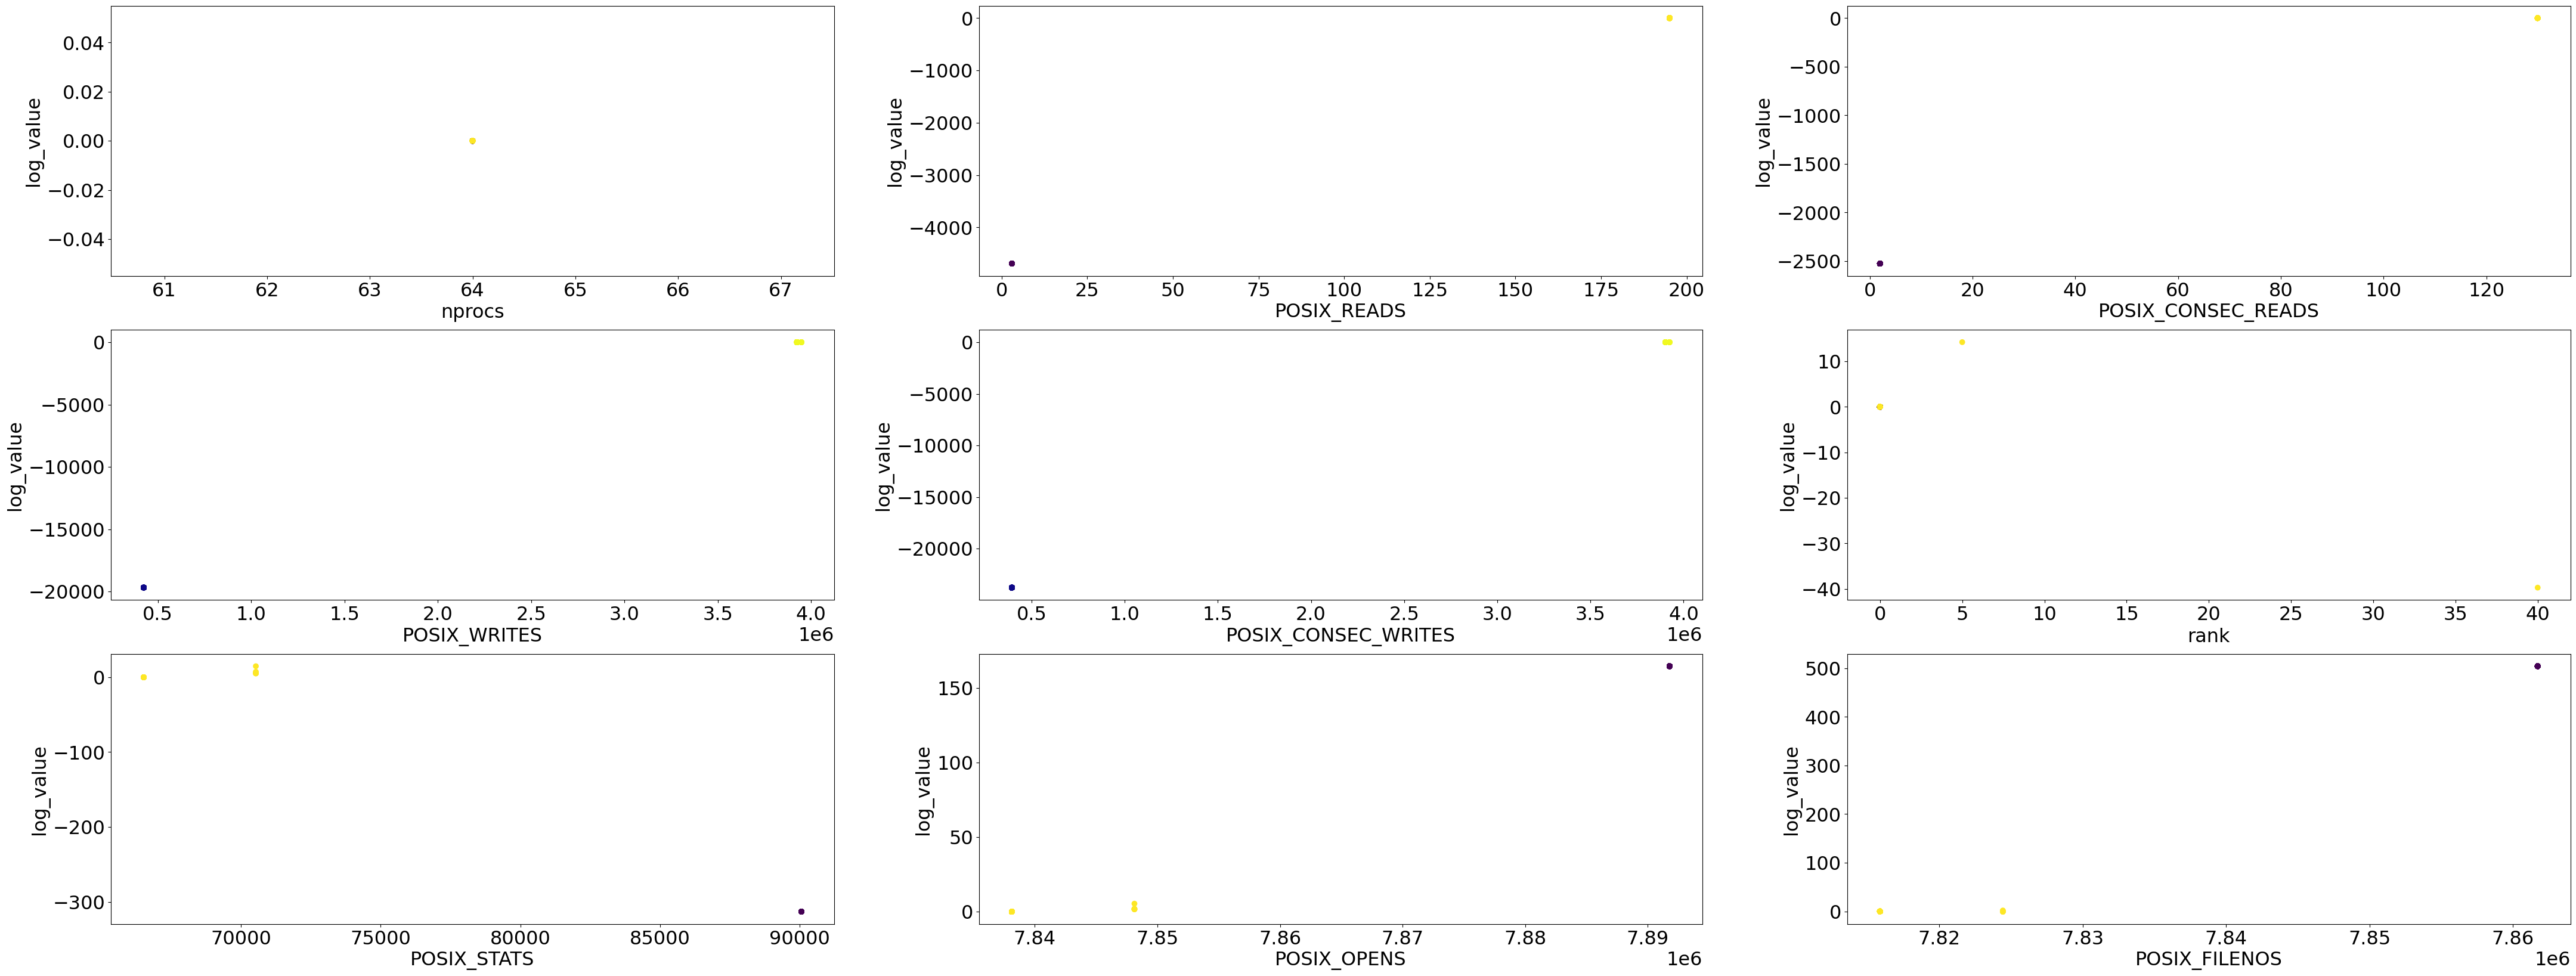

In [33]:
plot_mosaic(df_data["exe"].str.contains("cp2k") & (df_data["mean"].isna() == False))

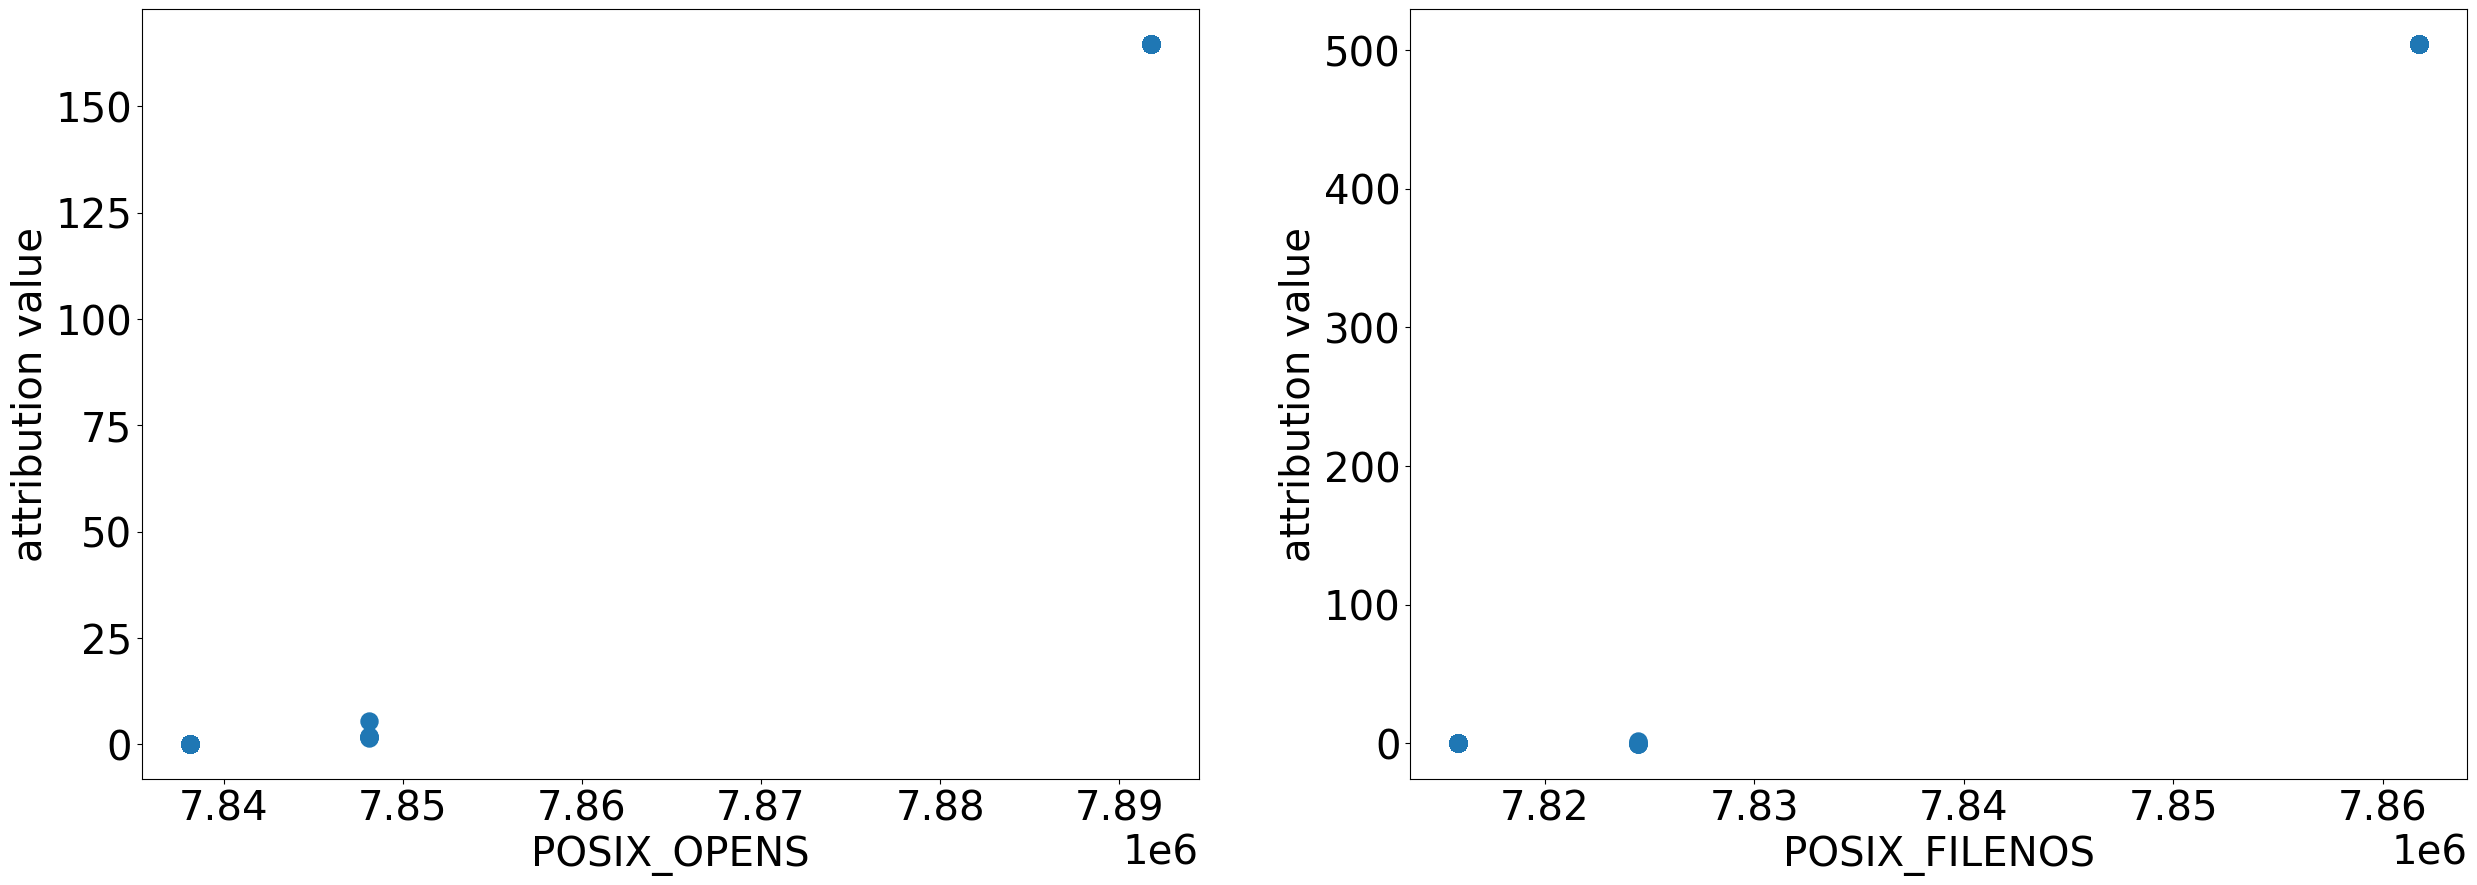

In [34]:
plt.rcParams.update({'font.size': 29})
filter_spec = df_data["exe"].str.contains("cp2k") & (df_data["mean"].isna() == False)
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
[ax.set_ylabel("attribution value") for ax in axs]
plot_df_w_filter_no_color(df,filter_spec,"POSIX_OPENS",axs[0],150)
plot_df_w_filter_no_color(df,filter_spec,"POSIX_FILENOS",axs[1],150)
plt.savefig("../results/interpretability/Theta_captum_plot_no_IQR_cp2k_dups_only.png",format="png",bbox_inches="tight")

## pw.x (QuantumExpresso)

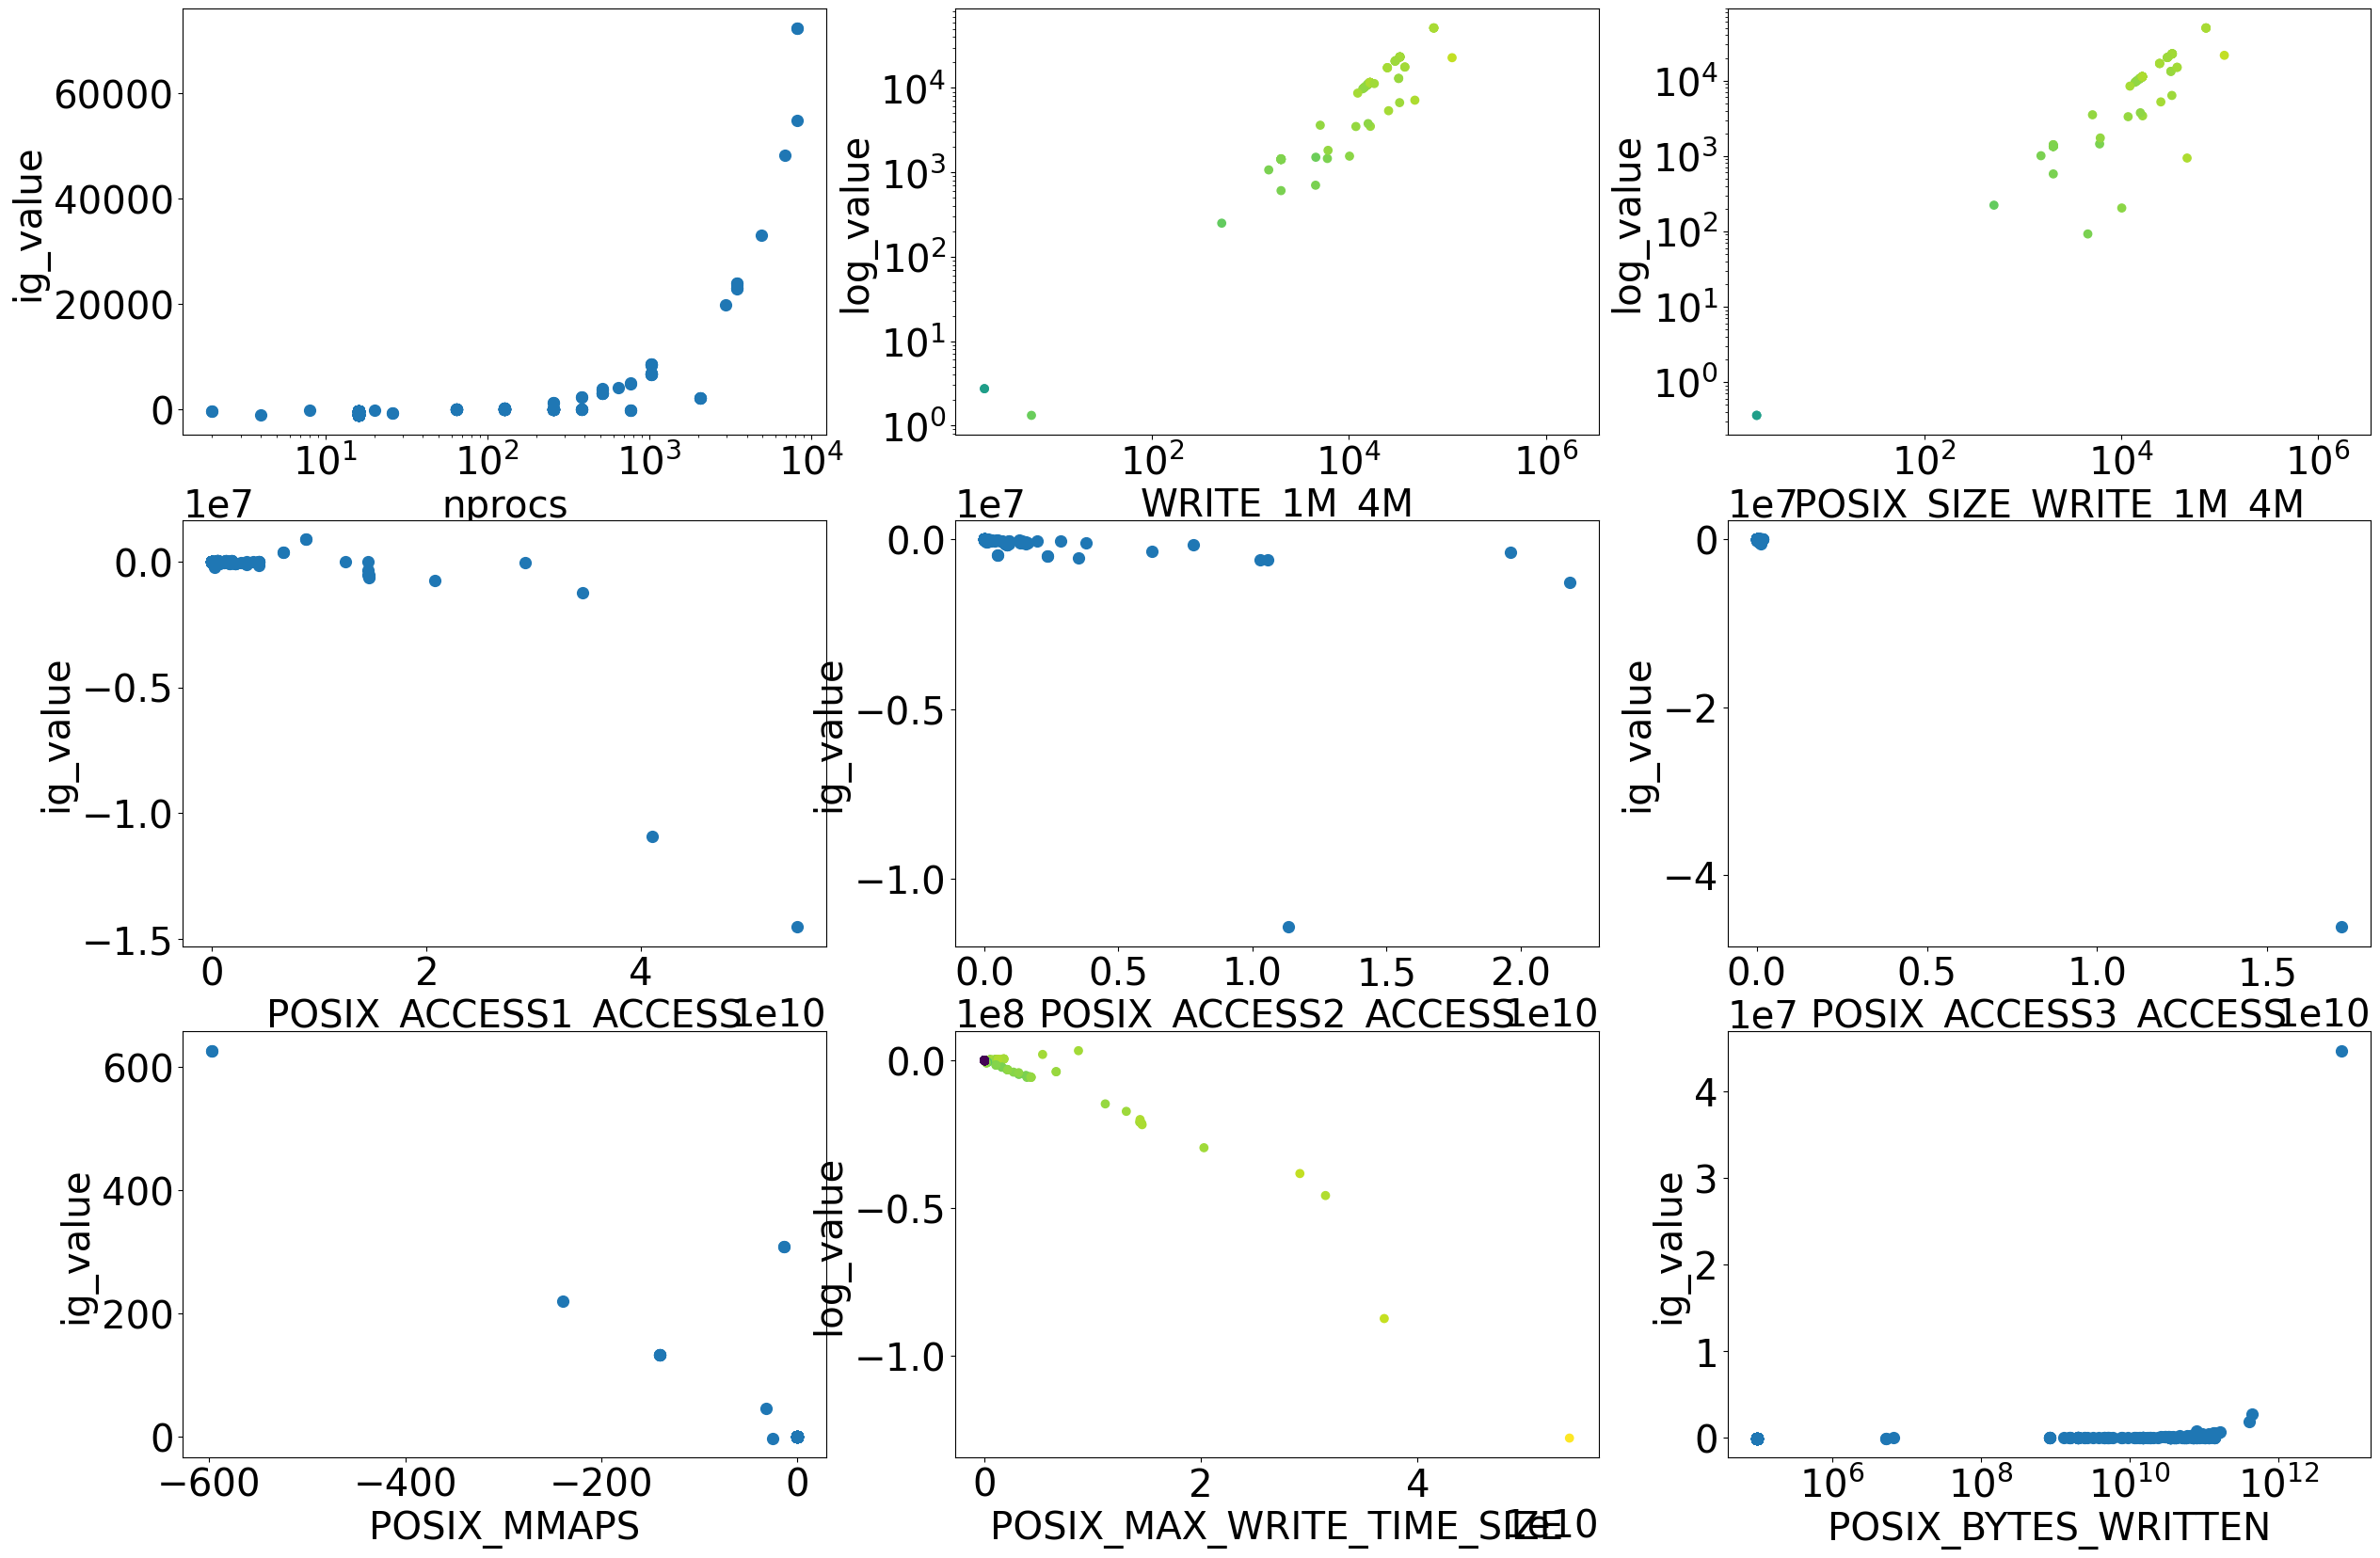

In [35]:
filter_spec = df_data["exe"].str.contains("pw.x")
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
[ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
plot_df_w_filter_no_color(df,filter_spec,"nprocs",axs[0,0])
plot_df_w_filter(df,filter_spec,"WRITE_1M_4M",axs[0,1],fig,bytes_written_copy)
plot_df_w_filter(df,filter_spec,"POSIX_SIZE_WRITE_1M_4M",axs[0,2],fig,bytes_written_copy)
plot_df_w_filter_no_color(df,filter_spec,"POSIX_ACCESS1_ACCESS",axs[1,0])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_ACCESS2_ACCESS",axs[1,1])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_ACCESS3_ACCESS",axs[1,2])
plot_df_w_filter_no_color(df,filter_spec,"POSIX_MMAPS",axs[2,0])
plot_df_w_filter(df,filter_spec,"POSIX_MAX_WRITE_TIME_SIZE",axs[2,1],fig,bytes_written_copy)
plot_df_w_filter_no_color(df,filter_spec,"POSIX_BYTES_WRITTEN",axs[2,2])
axs[0,0].set_xscale("log")
axs[0,1].set_yscale("log")
axs[0,1].set_xscale("log")
axs[0,2].set_yscale("log")
axs[0,2].set_xscale("log")
axs[2,2].set_xscale("log")

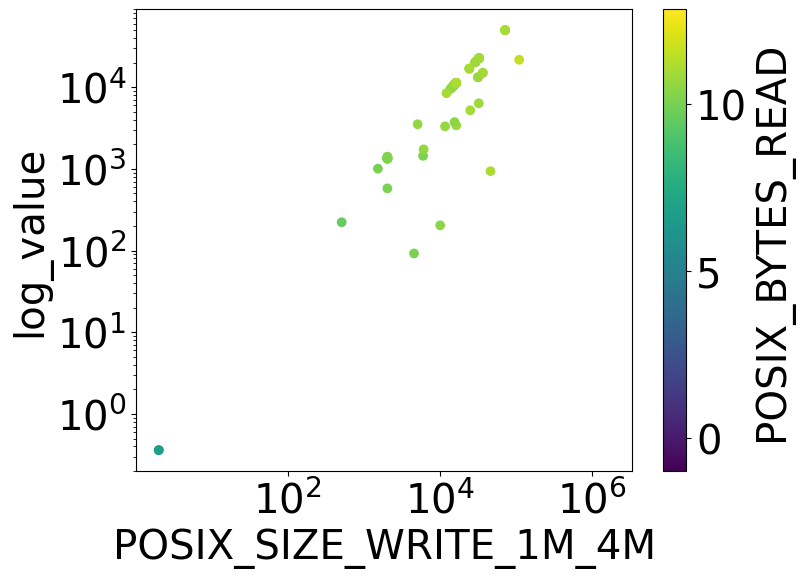

In [36]:
filter_spec = df_data["exe"].str.contains("pw.x")
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(8, 6))
axs.set_ylabel("ig_value")
sc_read = plot_df_w_filter(df,filter_spec,"POSIX_SIZE_WRITE_1M_4M",axs,fig,bytes_written_copy)
axs.set_xscale("log")
axs.set_yscale("log")
fig.colorbar(sc_read,label="POSIX_BYTES_READ")

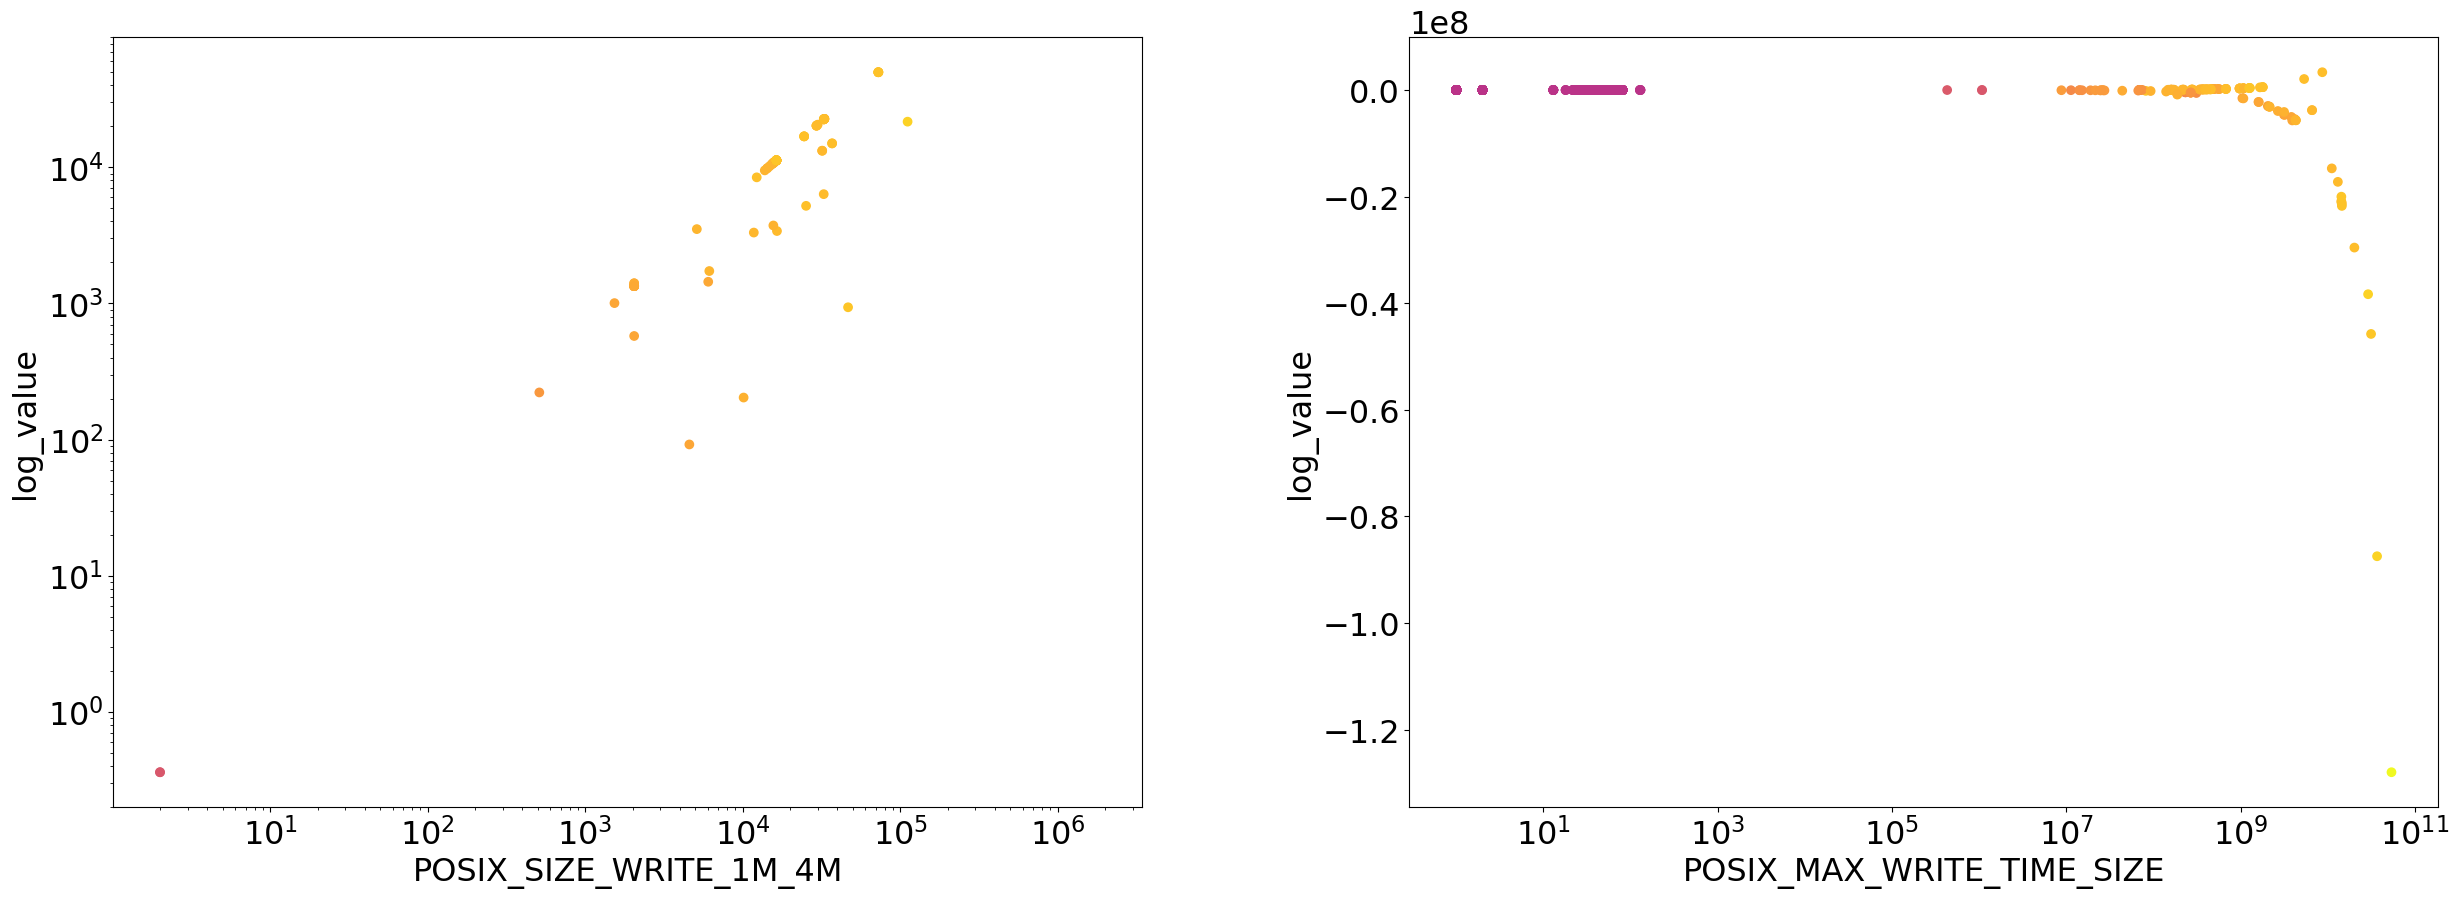

In [37]:
plt.rcParams.update({'font.size': 23})
filter_spec = df_data["exe"].str.contains("pw.x")
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
plt.subplots_adjust(wspace=0.26)
[ax.set_ylabel("attribution value") for ax in axs]
plot_df_w_filter(df,filter_spec,"POSIX_SIZE_WRITE_1M_4M",axs[0],fig,bytes_written_copy,"plasma")
plot_df_w_filter(df,filter_spec,"POSIX_MAX_WRITE_TIME_SIZE",axs[1],fig,bytes_written_copy,"plasma")
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[1].set_xscale("log")
plt.savefig("../results/interpretability/Theta_captum_plot_no_IQR_pwx_small_horizontal.png",format="png",bbox_inches="tight",dpi=600)

In [38]:
df_data[filter_spec]["POSIX_MMAPS"].unique()

array([   0, -140,  -14,  -32,  -25, -597, -239])

In [39]:
df[df_data["exe"].str.contains("pw.x")].describe().transpose().sort_values(by=["max"],ascending=False)

,count,mean,std,min,25%,50%,75%,max
POSIX_BYTES_READ,46972.0,2.015738e+08,2.159694e+09,-3.205000e+06,1.497855e+08,1.497855e+08,1.497855e+08,1.090881e+11
POSIX_MAX_BYTE_READ,46972.0,2.112493e+07,5.713120e+08,-2.286465e+09,1.985919e+06,1.985919e+06,1.985919e+06,3.018961e+10
POSIX_STRIDE2_STRIDE,46972.0,1.087060e+05,6.344525e+06,-1.585979e+07,0.000000e+00,-0.000000e+00,0.000000e+00,8.077224e+08
POSIX_STRIDE1_STRIDE,46972.0,1.390173e+05,3.450412e+06,-1.627417e+06,0.000000e+00,-0.000000e+00,0.000000e+00,1.591439e+08
POSIX_BYTES_WRITTEN,46972.0,-4.367505e+02,2.068298e+05,-4.990640e+03,-1.002891e+03,-1.002891e+03,-1.002891e+03,4.465325e+07
...,...,...,...,...,...,...,...,...
READ_4M_10M,46972.0,-6.772304e-03,4.022398e-01,-5.818866e+01,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
WRITE_10M_100M,46972.0,-1.674593e-04,1.943596e-02,-2.990587e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
WRITE_4M_10M,46972.0,-1.197382e-03,8.377696e-02,-9.806148e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
WRITE_1G_PLUS,46972.0,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
